<a href="https://colab.research.google.com/github/KimaruThagna/data-science-in-pycaret/blob/main/clustering_analysis_pycaret.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pycaret

     |████████████████████████████████| 256kB 4.1MB/s 
     |████████████████████████████████| 1.8MB 5.6MB/s 
     |████████████████████████████████| 102kB 9.4MB/s 
     |████████████████████████████████| 174kB 18.4MB/s 
     |████████████████████████████████| 14.2MB 332kB/s 
     |████████████████████████████████| 276kB 55.2MB/s 
     |████████████████████████████████| 65.8MB 109kB/s 
     |████████████████████████████████| 1.6MB 51.5MB/s 
     |████████████████████████████████| 6.8MB 42.4MB/s 
     |████████████████████████████████| 157.5MB 88kB/s 
     |████████████████████████████████| 245kB 45.1MB/s 
     |████████████████████████████████| 2.1MB 49.1MB/s 
     |████████████████████████████████| 153kB 49.7MB/s 
     |████████████████████████████████| 81kB 10.2MB/s 
     |████████████████████████████████| 61kB 8.9MB/s 
     |████████████████████████████████| 1.1MB 35.4MB/s 
     |████████████████████████████████| 163kB 47.4MB/s 
     |████████████████████████████████| 337kB 49.6MB/s

In [3]:
from pycaret.datasets import get_data
dataset = get_data('jewellery')


,Age,Income,SpendingScore,Savings
0,58,77769,0.791329,6559.829923
1,59,81799,0.791082,5417.661426
2,62,74751,0.702657,9258.992965
3,59,74373,0.765680,7346.334504
4,87,17760,0.348778,16869.507130


In [4]:
from pycaret.clustering import *
clustering_setup = setup(dataset, normalize=True)

,Description,Value
0,session_id,231
1,Original Data,"(505, 4)"
2,Missing Values,False
3,Numeric Features,4
4,Categorical Features,0
5,Ordinal Features,False
6,High Cardinality Features,False
7,High Cardinality Method,None
8,Transformed Data,"(505, 4)"
9,CPU Jobs,-1


In [6]:
models()

,Name,Reference
ID,,
kmeans,K-Means Clustering,sklearn.cluster._kmeans.KMeans
ap,Affinity Propagation,sklearn.cluster._affinity_propagation.Affinity...
meanshift,Mean Shift Clustering,sklearn.cluster._mean_shift.MeanShift
sc,Spectral Clustering,sklearn.cluster._spectral.SpectralClustering
hclust,Agglomerative Clustering,sklearn.cluster._agglomerative.AgglomerativeCl...
dbscan,Density-Based Spatial Clustering,sklearn.cluster._dbscan.DBSCAN
optics,OPTICS Clustering,sklearn.cluster._optics.OPTICS
birch,Birch Clustering,sklearn.cluster._birch.Birch
kmodes,K-Modes Clustering,kmodes.kmodes.KModes


In [7]:
#create model
model = create_model('kmeans')
model_2 = create_model('kmodes')

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,-0.3487,19.8356,3.1046,0,0,0


In [13]:
tuned_kmeans = tune_model(model = 'kmeans', supervised_target = 'Age')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,8.5497,140.6823,11.7131,0.7523,0.2382,0.1814
2,8.2672,116.3559,10.7306,0.7946,0.2521,0.1784
4,6.2017,63.1375,7.9059,0.8889,0.1666,0.1282
5,2.9099,12.9837,3.5822,0.9772,0.0836,0.0626
6,2.9142,13.0117,3.5869,0.9772,0.0837,0.0628
8,2.9241,13.0840,3.5945,0.9771,0.0840,0.0630
10,2.9222,13.0122,3.5846,0.9772,0.0834,0.0630
14,2.9484,13.2938,3.6218,0.9767,0.0846,0.0635
18,2.9951,13.5678,3.6678,0.9762,0.0851,0.0646
25,3.0286,13.8934,3.7073,0.9756,0.0861,0.0654


#Interpretation
Optimum number of clusters=5

#Model analysis and visualization

In [8]:
plot_model(model)

#PCA Plots
Generated 4 clusters from 2 PCA values(decomposed original 4 columns)

In [16]:
plot_model(model, plot='tsne')

#T-SNE Plot
From the T-sne plot, you can see that the clusters are more or less in terms of density. Cluster 2 exhibits unique behaviour where there are some values that may be of the same cluster but are not generally together with the rest of the cluster 2 values.
Cluster 0 and 2 seem to have values quite far from the rest of the values in the same cluster. Outliers maybe?

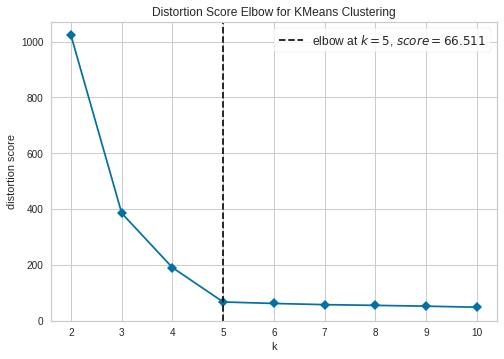

In [18]:
plot_model(model, plot='elbow')

#Interpretation
Elbow method is used to find optimal value of k. In this case, its 5

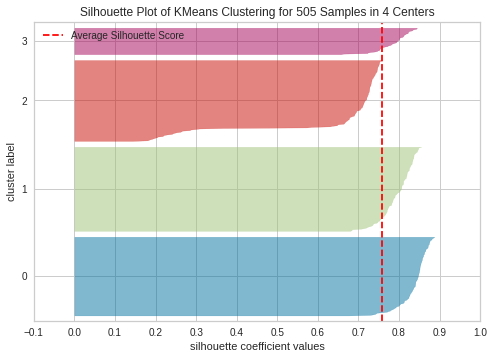

In [19]:
plot_model(model, plot='silhouette')

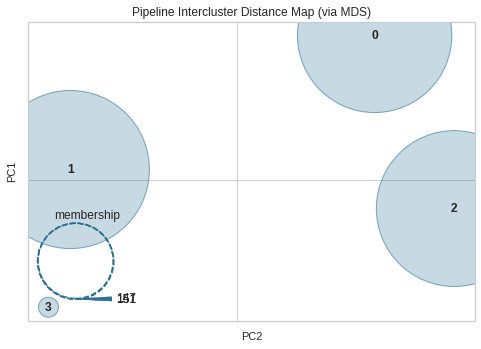

In [20]:
plot_model(model, plot='distance')

In [21]:
plot_model(model, plot='distribution')

#Interpretation
Number of records in each cluster. First 3 clusters roughly have a similar number of records

In [22]:
plot_model(model, plot='distribution', feature='Income')

# Interpretation
Along the Income data point, seperation of the clusters is relatively good. Especially with cluster 0. No overlap at all. To cure the over lap with clusters 1,2 and 3, we can add the other columns.
Interesting to note that class 0 and 1 have values way outside the normal range and above the **upper fence**

In [23]:
plot_model(model, plot='distribution', feature='Age')

# Interpretation
Serious overlap. Seems like a bad candidate for clustering if used alone. It is note worthy that cluster 1(50-70) is well seperated and that cluster 2 occurs in two segments. Maybe, the two segments are based on **Income**.
Very rich young people and very rich very old people.

In [24]:
plot_model(model, plot='distribution', feature='Savings')

# Interpretation
Cluster 3 is comprised of a young population. It may make sense as to why they have very minimal savings, if any.
Cluster 0 is comprised of the old population. All have some relatively significant amount of savings.
It is interesting to note that all cluster 2 records have relatively sufficient savings. Based on Age alone, cluster 2 is divided into 2 groups. Young(20-45) and old(75-95).

In [27]:
plot_model(model, plot='distribution', feature='SpendingScore')

# Interpretation
In terms of spending scores, the clusters are divided into 2 very distinct groups
Low spending scores(spending on jewellery)- Cluster 2(youthful) Maybe much responsibilities and cluster 0(very old)-age, doesnt spend much on jewellery

High spending scores- Cluster 1-Maybe has the money for it
Cluster 3- Maybe jewellery is appealing due to the age factor.

# Model Assignment


In [9]:
# assign cluster labels to records
clustered_dataset = assign_model(model)
clustered_dataset.head()

,Age,Income,SpendingScore,Savings,Cluster
0,58,77769,0.791329,6559.829923,Cluster 1
1,59,81799,0.791082,5417.661426,Cluster 1
2,62,74751,0.702657,9258.992965,Cluster 1
3,59,74373,0.765680,7346.334504,Cluster 1
4,87,17760,0.348778,16869.507130,Cluster 0


In [11]:
# peform predictions
predictions = predict_model(model, dataset)
predictions.head()

,Age,Income,SpendingScore,Savings,Cluster
0,58,77769,0.791329,6559.829923,Cluster 1
1,59,81799,0.791082,5417.661426,Cluster 1
2,62,74751,0.702657,9258.992965,Cluster 1
3,59,74373,0.765680,7346.334504,Cluster 1
4,87,17760,0.348778,16869.507130,Cluster 0
